## ISMT S-136 Time Series Analysis with Python, Summer 2021  
### Section 6

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.stattools import acf, pacf

## Predition Intervals: AR(2)

In [2]:
# generate n observations of AR(2)
phi =   np.array([1.8, -0.9])
theta = np.array([0.])
         
ar = np.r_[1, -phi]
ma = np.r_[1, theta]
sigma = 1    
np.random.seed(1678)
sigma = 1.0
n=80
xt = smt.arma_generate_sample(ar=ar, ma=ma, sigma=sigma, nsample=n)

# estimate parameters of AR(2) based on the sample run xt of n observations
p = 2
model = ARIMA(xt, order=(p,0,0))
model_fit = model.fit(method='css')
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   80
Model:                     ARMA(2, 0)   Log Likelihood                 -94.329
Method:                           css   S.D. of innovations              0.811
Date:                Mon, 12 Jul 2021   AIC                            196.657
Time:                        13:51:00   BIC                            206.084
Sample:                             2   HQIC                           200.431
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3518      0.797      1.696      0.094      -0.210       2.914
ar.L1.y        1.6805      0.072     23.325      0.000       1.539       1.822
ar.L2.y       -0.7965      0.074    -10.726      0.0

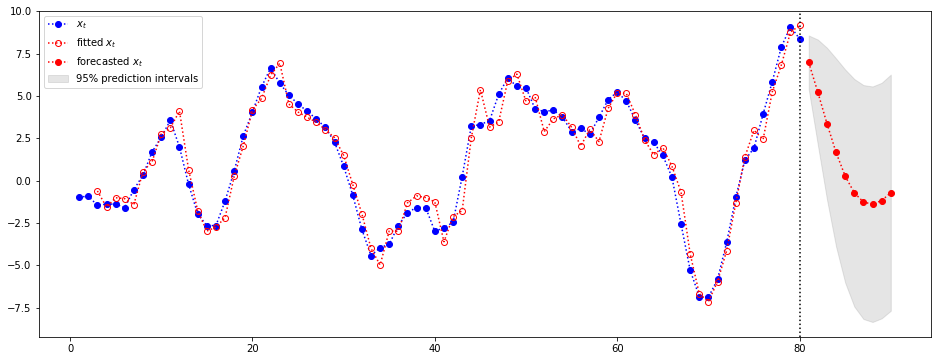

In [3]:
# check n fitted values
xt_fitted = model_fit.predict()
plt.figure(figsize=(16,6))
plt.plot(range(1,n+1),xt,linestyle=':', marker='o',color='blue',label = "$x_t$")
plt.plot(range(p+1,n+1),xt_fitted,linestyle=':', marker='o', mfc='none', color='red',label = "fitted $x_t$")

# forecast m steps ahead starting from n+1
m=10
#xt_forecasted = model_fit.predict(start=n, end=n+m-1)
[xt_forecasted,std_error,pred_int] = model_fit.forecast(steps=m, exog=None, alpha=0.05)
plt.axvline(x=n,linestyle=':',color='k')
plt.plot(range(n+1,n+m+1), xt_forecasted, linestyle=':', marker='o',color='red',label = "forecasted $x_t$")
plt.fill_between(range(n+1,n+m+1), pred_int[:,0], pred_int[:,1], color='gray', alpha=.2,label = "95% prediction intervals")
plt.legend(loc = 'upper left')

## Predition Intervals: AR(3)

In [4]:
# generate n observations of AR(3)
phi =   np.array([1.2, -0.7, -0.1])
theta = np.array([0.])
         
ar = np.r_[1, -phi]
ma = np.r_[1, theta]

arma_process = smt.ArmaProcess(ar, ma)
print("Is the process causal?      Answer:",arma_process.isstationary)
print("Is the process invertible?  Answer:",arma_process.isinvertible)
print("\n")
    
np.random.seed(1678)
sigma = 1.0
n=100
xt = smt.arma_generate_sample(ar=ar, ma=ma, sigma=sigma, nsample=n)

# estimate parameters of AR(2) based on the sample run xt of n observations
p = 3
model = ARIMA(xt, order=(p,0,0))
model_fit = model.fit(method='css')
print(model_fit.summary())

Is the process causal?      Answer: True
Is the process invertible?  Answer: True


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(3, 0)   Log Likelihood                -114.640
Method:                           css   S.D. of innovations              0.789
Date:                Mon, 12 Jul 2021   AIC                            239.279
Time:                        13:51:26   BIC                            252.153
Sample:                             3   HQIC                           244.485
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3145      0.117      2.684      0.009       0.085       0.544
ar.L1.y        1.1430      0.100     11.374    

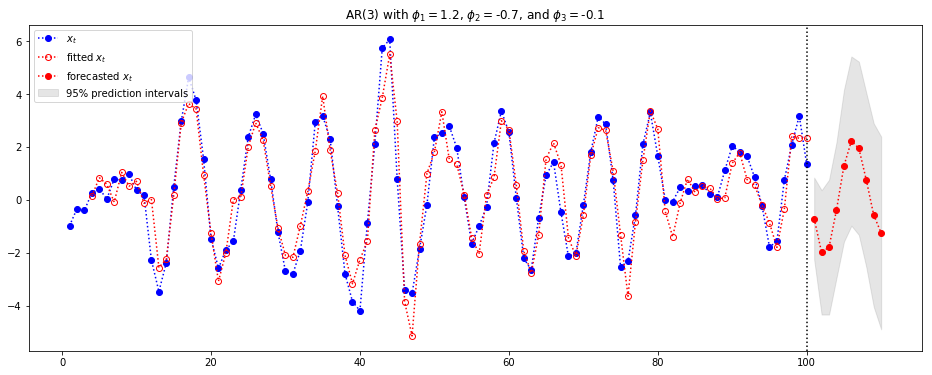

In [5]:
# check n fitted values
xt_fitted = model_fit.predict()
plt.figure(figsize=(16,6))
plt.plot(range(1,n+1),xt,linestyle=':', marker='o',color='blue',label = "$x_t$")
plt.plot(range(p+1,n+1),xt_fitted,linestyle=':', marker='o', mfc='none', color='red',label = "fitted $x_t$")
plt.title("AR(3) with $\phi_1=$" + str(phi[0]) + ", $\phi_2=$" + str(phi[1]) + ", and $\phi_3=$" + str(phi[2]))

# forecast m steps ahead starting from n+1
m=10
#xt_forecasted = model_fit.predict(start=n, end=n+m-1)
[xt_forecasted,std_error,pred_int] = model_fit.forecast(steps=m, exog=None, alpha=0.05)
plt.axvline(x=n,linestyle=':',color='k')
plt.plot(range(n+1,n+m+1), xt_forecasted, linestyle=':', marker='o',color='red',label = "forecasted $x_t$")
plt.fill_between(range(n+1,n+m+1), pred_int[:,0], pred_int[:,1], color='gray', alpha=.2,label = "95% prediction intervals")
plt.legend(loc = 'upper left')

## Predition Intervals: MA(3)

In [6]:
# generate n observations of MA(3)
phi =   np.array([0])
theta = np.array([-0.8, 0.9, -0.6])
         
ar = np.r_[1, -phi]
ma = np.r_[1, theta]

arma_process = smt.ArmaProcess(ar, ma)
print("Is the process causal?      Answer:",arma_process.isstationary)
print("Is the process invertible?  Answer:",arma_process.isinvertible)
print("\n")
 
np.random.seed(165889)
sigma = 1
n=100
xt = smt.arma_generate_sample(ar=ar, ma=ma, sigma=sigma, nsample=n)

# estimate parameters of AR(2) based on the sample run xt of n observations
p = 0
q = 3
model = ARIMA(xt, order=(p,0,q))
model_fit = model.fit(method='css')
print(model_fit.summary())

Is the process causal?      Answer: True
Is the process invertible?  Answer: True


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(0, 3)   Log Likelihood                -151.749
Method:                           css   S.D. of innovations              1.104
Date:                Mon, 12 Jul 2021   AIC                            313.497
Time:                        13:51:36   BIC                            326.523
Sample:                             0   HQIC                           318.769
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0398      0.040      0.993      0.323      -0.039       0.118
ma.L1.y       -0.7886      0.084     -9.341    

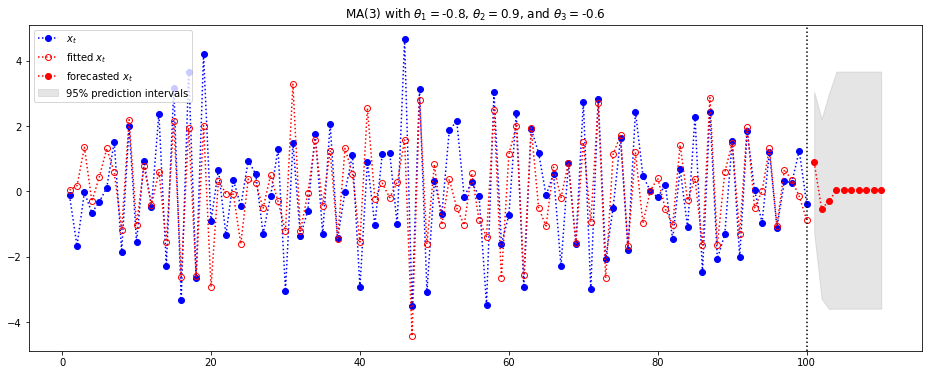

In [7]:
# check n fitted values
xt_fitted = model_fit.predict()
plt.figure(figsize=(16,6))
plt.plot(range(1,n+1),xt,linestyle=':', marker='o',color='blue',label = "$x_t$")
plt.plot(range(p+1,n+1),xt_fitted,linestyle=':', marker='o', mfc='none', color='red',label = "fitted $x_t$")
plt.title("MA(3) with $\\theta_1=$" + str(theta[0]) + ", $\\theta_2=$" + str(theta[1]) + ", and $\\theta_3=$" + str(theta[2]))


# forecast m steps ahead starting from n+1
m=10
#xt_forecasted = model_fit.predict(start=n+1, end=n+m-1)
[xt_forecasted,std_error,pred_int] = model_fit.forecast(steps=m, exog=None, alpha=0.05)
plt.axvline(x=n,linestyle=':',color='k')
plt.plot(range(n+1,n+m+1), xt_forecasted, linestyle=':', marker='o',color='red',label = "forecasted $x_t$")
plt.fill_between(range(n+1,n+m+1), pred_int[:,0], pred_int[:,1], color='gray', alpha=.2,label = "95% prediction intervals")
plt.legend(loc = 'upper left')

## Predition Intervals: Number of Sunspots

In [8]:
df = pd.read_csv('C:/data/Time_Series_Analysis_with_Python/sunspots_yearly.csv', parse_dates=['year'],index_col='year')
print(df.shape)
df.head(3)

(319, 1)


,number
year,
1700-01-01,8.3
1701-01-01,18.3
1702-01-01,26.7


In [9]:
# original series
xt = df['number']

# transformation
yt = np.sqrt(xt)

xt_train = xt[:'2008-01-01']
xt_test = xt['2009-01-01':]
yt_train = yt[:'2008-01-01']
yt_test = yt['2009-01-01':]

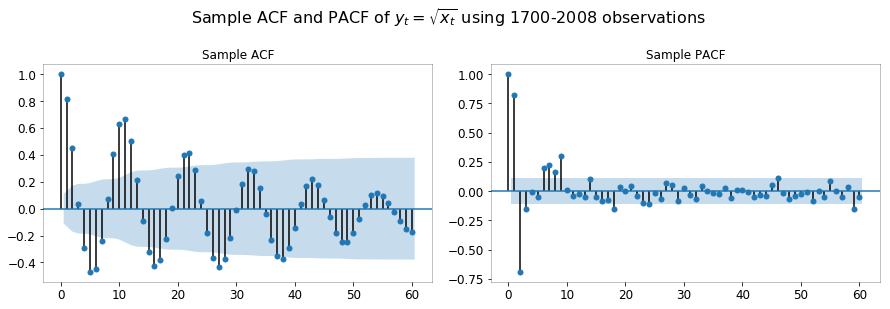

In [10]:
h_max = 60

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15,4))
fig.suptitle('Sample ACF and PACF of $y_t=\sqrt{x_t}$ using 1700-2008 observations',y=1.08,size=16)
plt.subplots_adjust(wspace = 0.15)
plot_acf(yt_train, ax=ax[0], lags=h_max)
plot_pacf(yt_train, ax=ax[1], alpha=0.05, lags=h_max)

for k in range(2):
    ax[k].tick_params(axis='both', labelsize=12)
    [ax[k].spines[line].set_alpha(.3) for line in ["top","bottom","right","left"]]

ax[0].set_title("Sample ACF")
ax[1].set_title("Sample PACF")   

plt.show()

In [12]:
# estimate parameters of AR(2) based on the sample run xt of n observations
p = 9

model = ARIMA(yt_train, order=(p,0,0))
model_fit = model.fit(method='css')
print(model_fit.summary())

C:\Users\dmk620\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                 number   No. Observations:                  309
Model:                     ARMA(9, 0)   Log Likelihood                -503.154
Method:                           css   S.D. of innovations              1.295
Date:                Mon, 12 Jul 2021   AIC                           1028.308
Time:                        13:52:01   BIC                           1069.050
Sample:                    01-01-1709   HQIC                          1044.613
                         - 01-01-2008                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.3222      0.532     15.657      0.000       7.280       9.364
ar.L1.number     1.2195      0.055     22.100      0.000       1.111       1.328
ar.L2.number    -0.5040      0.088     -5.69

In [13]:
yt_fitted = model_fit.predict()
#yt_forecasted = model_fit.predict(start='2009-01-01', end='2018-01-01')
[yt_forecasted,std_error,pred_int] = model_fit.forecast(steps=m, exog=None, alpha=0.05)

xt_fitted = yt_fitted**2
xt_forecasted = yt_forecasted**2
xt_lower = pred_int[:,0]**2
xt_upper = pred_int[:,1]**2


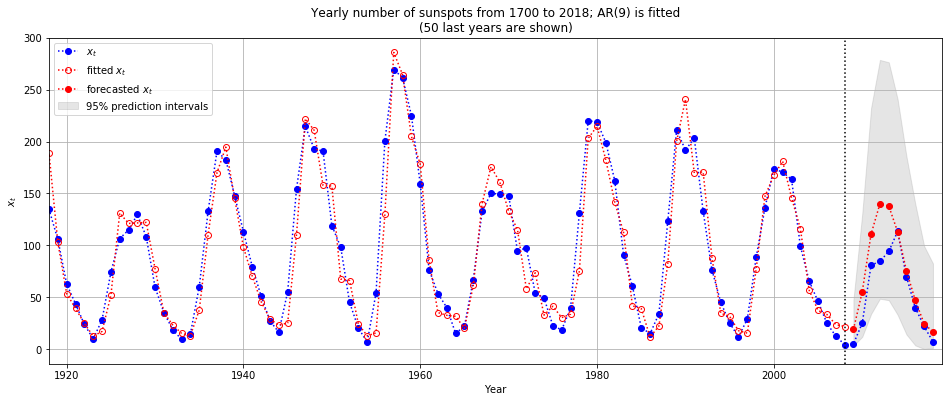

In [15]:
n = len(xt)
n_train = len(xt_train)

plt.figure(figsize=(16,6))
plt.plot(xt.index,xt,linestyle=':', marker='o',color='blue',label = "$x_t$")
plt.plot(xt_fitted.index,xt_fitted,linestyle=':', marker='o', mfc='none', color='red',label = "fitted $x_t$")
plt.xlabel("Year")
plt.ylabel("$x_t$")
plt.title("Yearly number of sunspots from 1700 to 2018; AR(9) is fitted\n(50 last years are shown)")
plt.grid(True)
plt.xlim('1918-01-01','2019-01-01')

# forecast m steps ahead starting from n+1
plt.axvline(x='2008-01-01',linestyle=':',color='k')
plt.plot(xt_test.index, xt_forecasted, linestyle=':', marker='o',color='red',label = "forecasted $x_t$")
plt.fill_between(xt_test.index, xt_lower, xt_upper, color='gray', alpha=.2,label = "95% prediction intervals")
plt.legend(loc = 'upper left')